# INTRODUCTION

- The objective of this dataset is to build a predictive model for diagnosing diabetes in female patients who are at least 21 years old Pregrenant ladies and of Pima Indian heritage. 

- The model should predict whether a patient has diabetes (Outcome = 1) or does not have diabetes (Outcome = 0) based on several diagnostic measurements, including glucose level, blood pressure, skin thickness, insulin level, BMI, diabetes pedigree function, and age.

# Data description

1	Pregnancies =	Number of pregnancies

2	Glucose =	Glucose level in blood

3	BloodPressure =	Blood pressure measurement

4	SkinThickness =	Thickness of the skin

5	Insulin =	Insulin level in blood

6	BMI =	Body mass index

7	DiabetesPedigreeFunction =	Diabetes percentage

8	Age =	Age

9	Outcome =	Final result (1: Yes, the individual has diabetes; 0: No, the individual does not                               have diabetes)

# Importing Libraries

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix  # Ensure this import is included
import joblib
import warnings
warnings.filterwarnings('ignore')

# BASIC EXPLORATION

## Reading dataset

In [28]:
df = pd.read_csv("C:/Users/ankuv/Desktop/DAB/Semester 4/DAB 304/DIABETIES - PROJECT/diabetes.csv")

# Some information

## Display data content

In [29]:
styled_df = df.head(5).style

# Set background color, text color, and border for the entire DataFrame
styled_df.set_properties(**{"background-color": "#254E58", "color": "#e9c46a", "border": "1.5px solid black"})

# Modify the color and background color of the table headers (th)
styled_df.set_table_styles([
    {"selector": "th", "props": [("color", 'white'), ("background-color", "#333333")]}
])

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.600000,0.627000,50,1
1,1,85,66,29,0,26.600000,0.351000,31,0
2,8,183,64,0,0,23.300000,0.672000,32,1
3,1,89,66,23,94,28.100000,0.167000,21,0
4,0,137,40,35,168,43.100000,2.288000,33,1


### Number of rows, number of columns

In [30]:
rows , col =  df.shape
print(f"Number of Rows : {rows} \nNumber of Columns : {col}")

Number of Rows : 768 
Number of Columns : 9


In [50]:
# Check the type of 'pima'
type(df)

pandas.core.frame.DataFrame

###  Basic info

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Count null/nan values

In [32]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

these all are showing '0', which means there are no missing values for all the columns. 

Here our data is good to go and good to proceed.👌

# No missing values Found

### Description

In [33]:
styled_df = df.describe().style \
    .set_table_styles([
        {'selector': 'th', 'props': [('background-color', '#254E58'), ('color', 'white'), ('font-weight', 'bold'), ('text-align', 'left'), ('padding', '8px')]},
        {'selector': 'td', 'props': [('padding', '8px')]}
    ]) \
    .set_properties(**{'font-size': '14px', 'background-color': '#F5F5F5', 'border-collapse': 'collapse', 'margin': '10px'})

# Display the styled DataFrame
styled_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


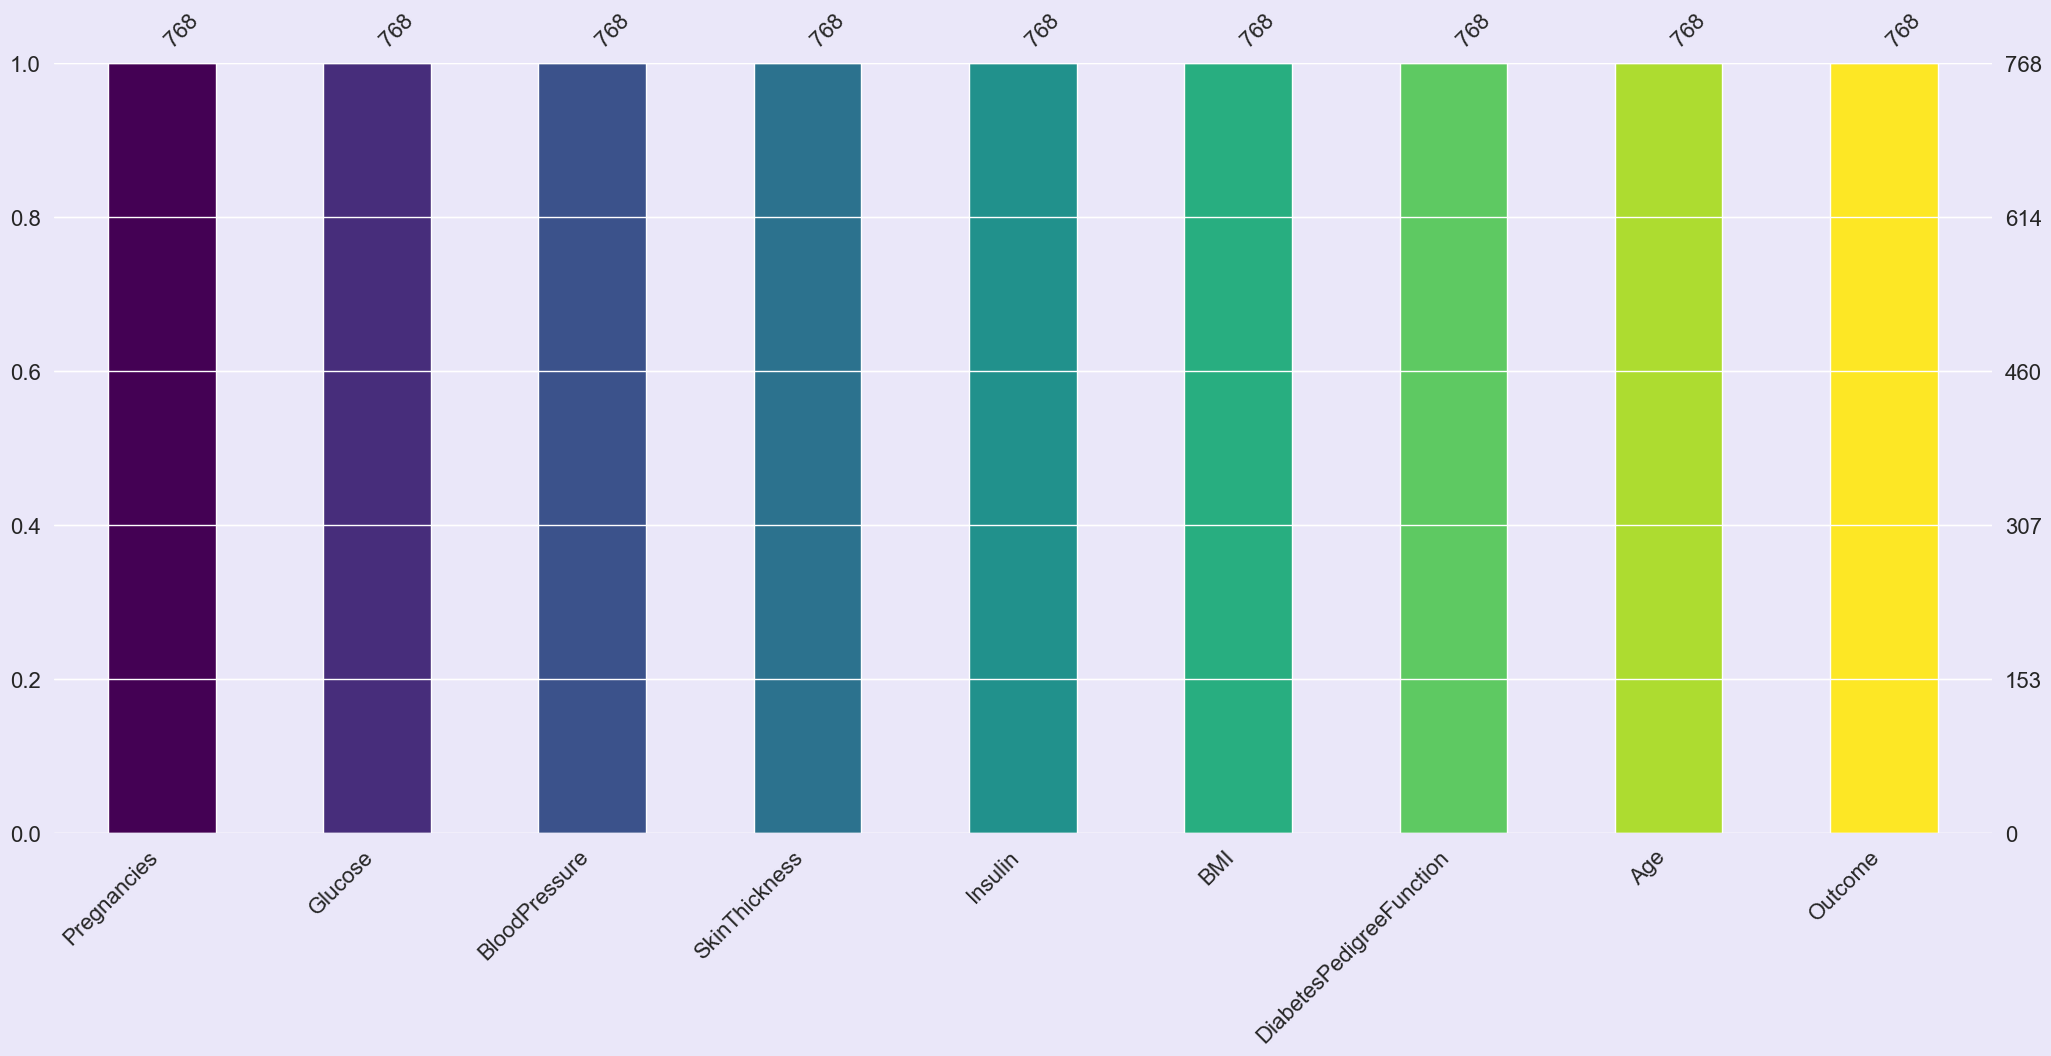

In [51]:
num_columns = len(df.columns)
colors = plt.cm.viridis(np.linspace(0, 1, num_columns))  

msno.bar(df, color=colors)
plt.show()

###### Each bar represents a column in the DataFrame.

###### The height of the bar corresponds to the number of non-missing values in that column.

###### The color of each bar is determined by the Viridis colormap, making it easier to differentiate columns.
##### Why Use This Chart?
###### Quick overview of missing data: It helps identify which columns have missing values.
###### Visual comparison: You can see which columns are mostly complete or missing significant data.
###### Preprocessing insights: If a column has too many missing values, you might decide to drop or impute it.

# Data visualization

### Distributions of attributes

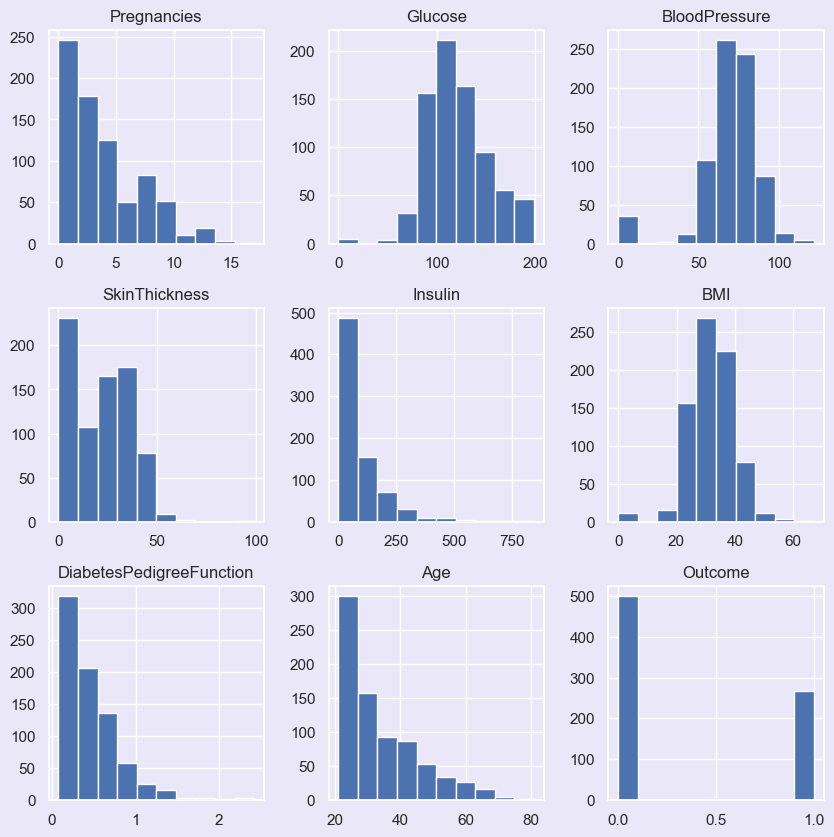

In [35]:
df.hist(figsize = (10,10))
plt.show()

### Pairplot of attributes

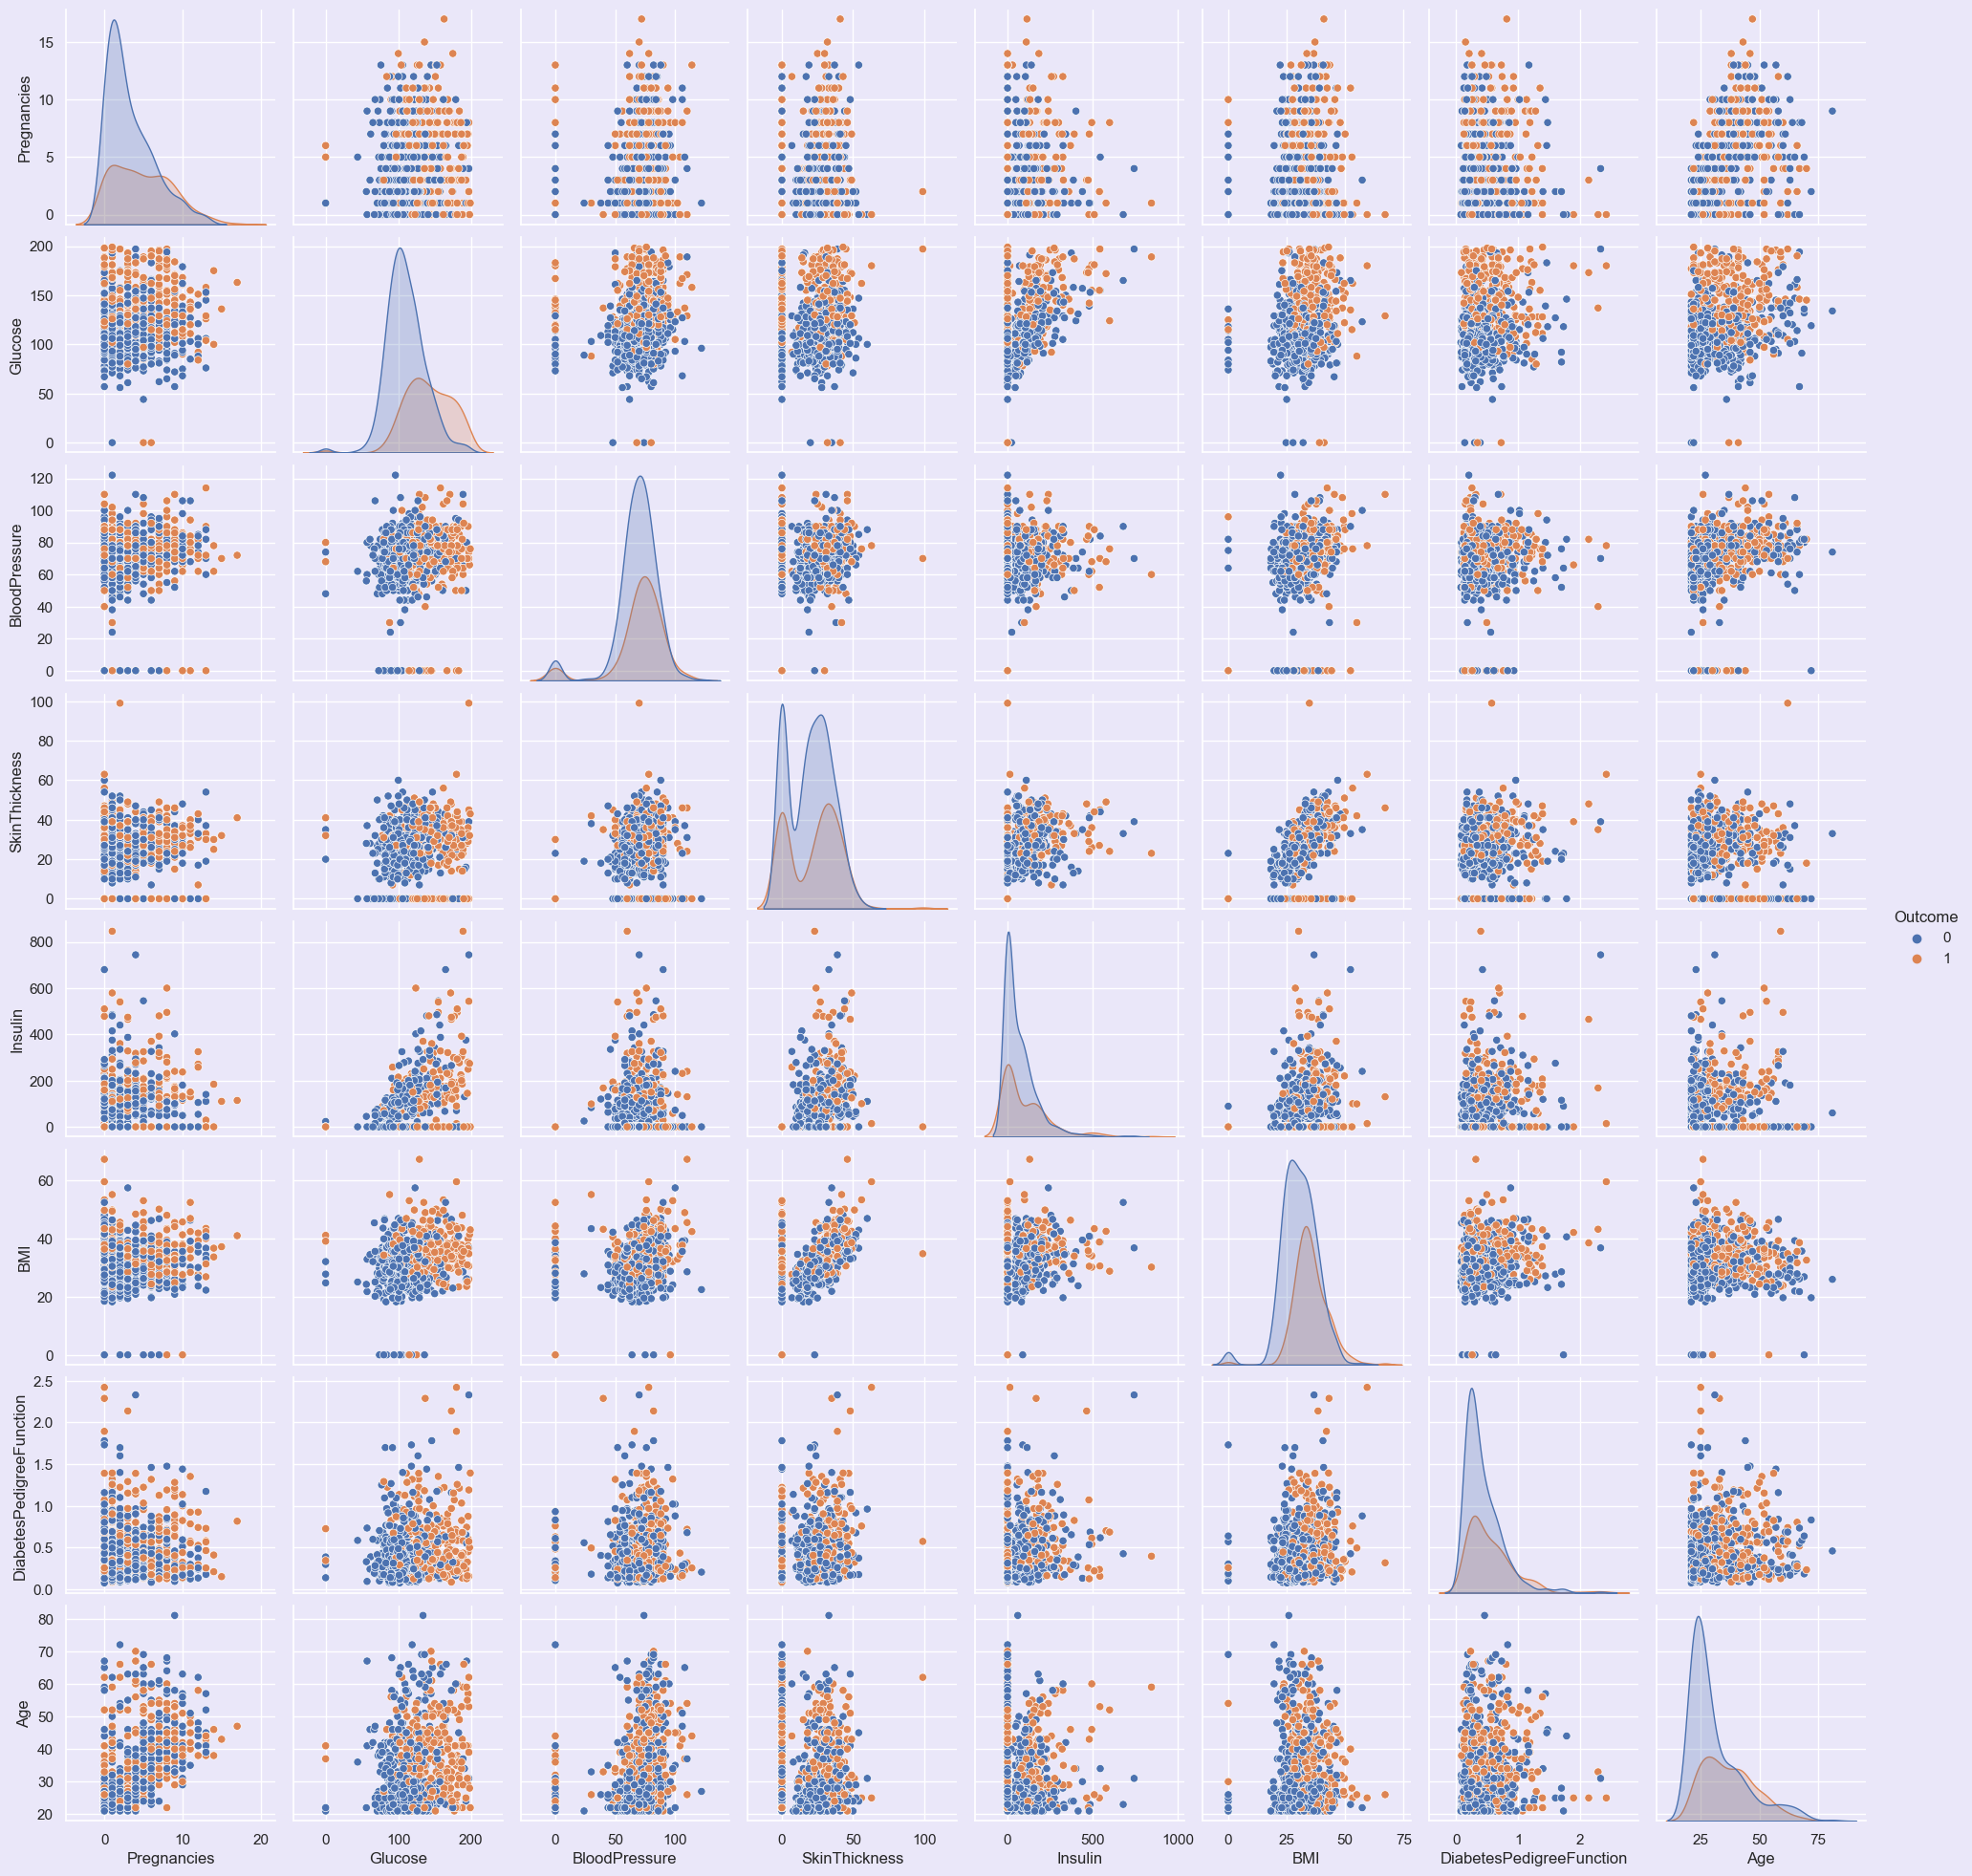

In [36]:
sns.pairplot(data = df, hue = 'Outcome' )
plt.show()

#### Highlights:

o	Diabetic patients show higher Glucose and BMI values.

o	Insulin and Skin Thickness do not clearly separate diabetic and non-diabetic groups.

o	Age shows some correlation with diabetes, with older individuals more likely diabetic.

####	Main Observations:

o	Glucose and BMI are strong predictors.

o	Features like Insulin and Skin Thickness show more overlap between groups.


### Age and outcome

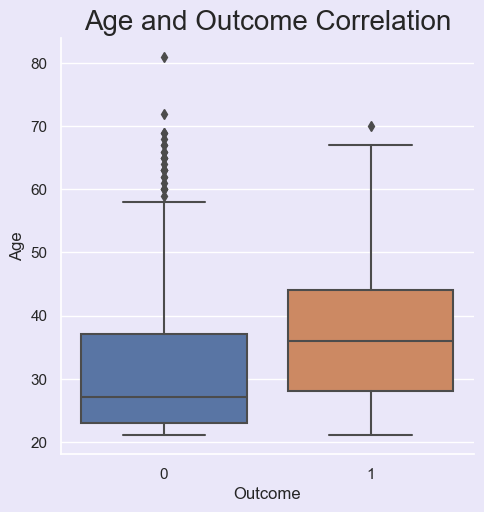

In [37]:
sns.set(rc={"axes.facecolor":"#EAE7F9","figure.facecolor":"#EAE7F9"})
p=sns.catplot(x="Outcome",y="Age", data=df, kind='box')
plt.title("Age and Outcome Correlation", size=20, y=1.0);

####	Insights:

o	Age is a distinguishing factor, with diabetic pragnant ladies are generally older.

o	Interquartile Range (IQR): Broader age range for diabetic individuals.
                                                
####	Main Observations:
                                                
o	Custom background color and larger title enhance readability.


### Correlation between attributes

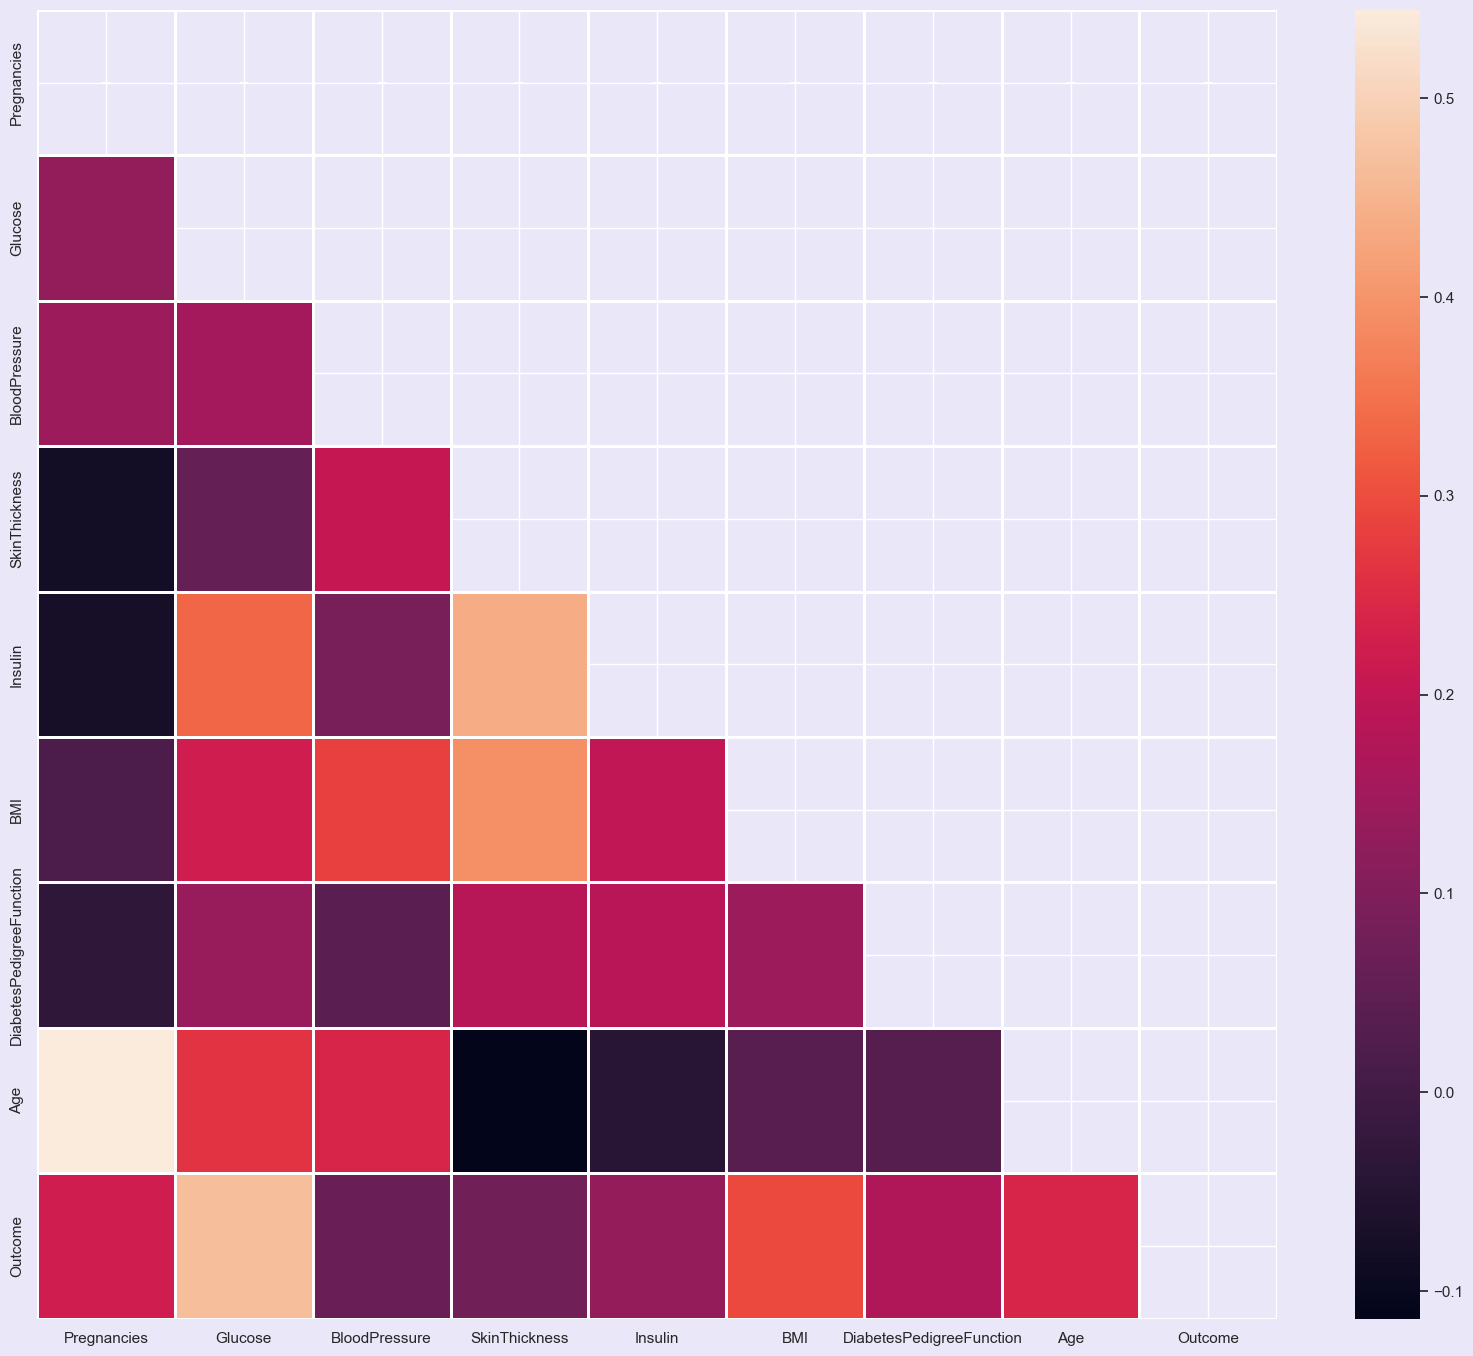

In [38]:
plt.figure(figsize=(20, 17))
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), annot=True, linewidth=.8, mask=matrix, cmap="rocket");

####	Strong Correlations:

o	Glucose & Outcome: High correlation.

o	BMI & Outcome: Moderate correlation.

####	Low Correlations:

o	Blood Pressure & Skin Thickness: Weak correlation with the outcome.

#####	Inter-feature: 

o  Positive correlation between Insulin & Glucose.

#### High Glucose and High Outcome: If pregnant women have high glucose levels, it indicates a higher likelihood that they may be diagnosed with gestational diabetes (where "Outcome" represents the diagnosis of diabetes). Essentially, as glucose levels increase, the chances that these women are at risk for diabetes also increase.
#### Importance of Monitoring:
###### Risk Assessment: Healthcare providers often monitor glucose levels in pregnant women as part of prenatal care. High levels can prompt further testing and intervention to manage blood sugar and reduce risks to both the mother and the baby.
###### Potential Complications: Unmanaged high glucose during pregnancy can lead to complications such as excessive weight gain in the baby, preterm birth, and an increased risk of developing diabetes later in life for both the mother and child.

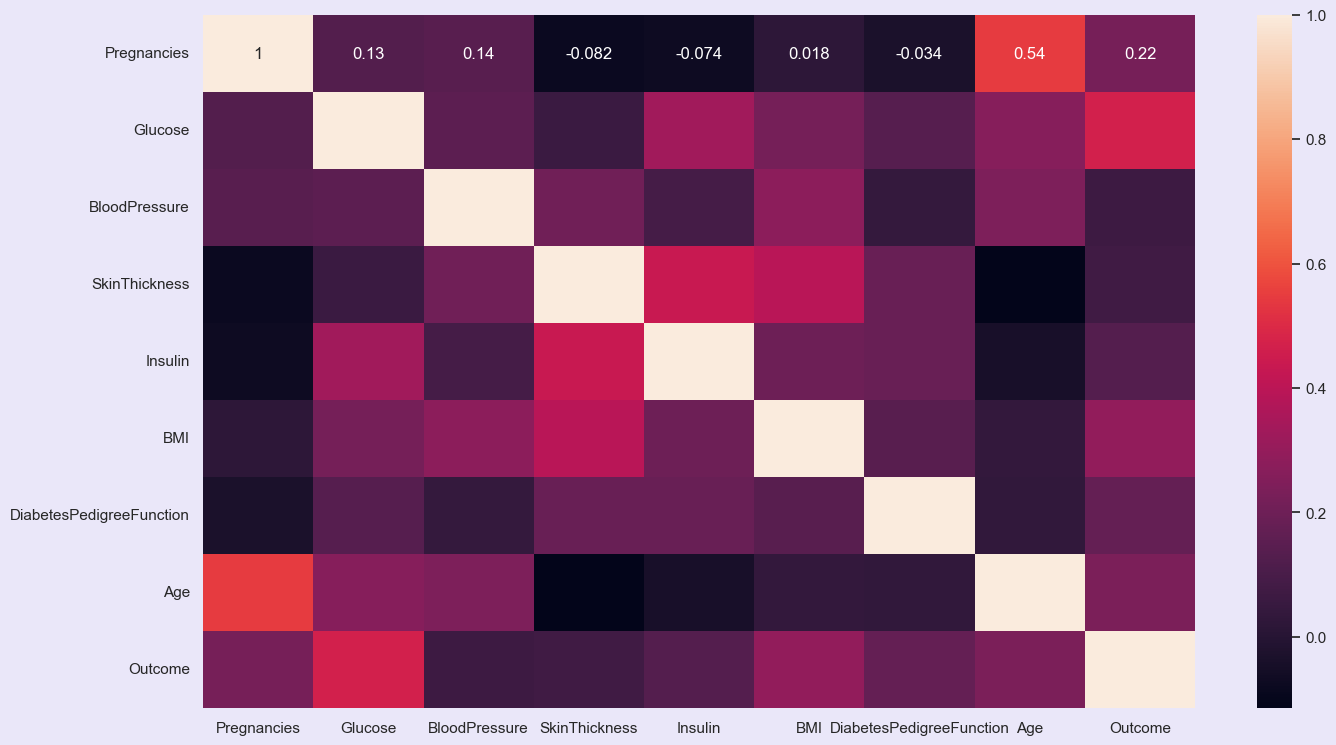

In [39]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(), annot=True);

o	Glucose and BMI have the strongest positive correlations with the outcome.
    
o	Age shows moderate correlation, older individuals are more at risk.

o	Blood Pressure & Skin Thickness have weak correlations.

####	Inter-feature: Relationships like Age & Pregnancies show logical correlations.


##### Key Observations:
###### Glucose and BMI Correlation: High glucose and BMI levels are strongly associated with an increased risk of gestational diabetes. Monitoring these metrics is essential for ensuring a healthy pregnancy.
###### Age Factor: Older pregnant women are at a moderate risk for developing gestational diabetes. Regular screenings are important, especially for those over 35.
###### Blood Pressure and Skin Thickness: Weak correlations exist between blood pressure and skin thickness with gestational diabetes risk, indicating these may be less critical indicators compared to glucose and BMI.
###### Logical Relationships: The relationship between age and number of pregnancies is logical; older women tend to have had more pregnancies, which may affect their risk for gestational diabetes.

In [40]:
hig_corr = df.corr()
hig_corr_features = hig_corr.index[abs(hig_corr["Outcome"]) >= 0.2]
hig_corr_features

Index(['Pregnancies', 'Glucose', 'BMI', 'Age', 'Outcome'], dtype='object')

### Standard Deviation

In [41]:
df.var()

Pregnancies                    11.354056
Glucose                      1022.248314
BloodPressure                 374.647271
SkinThickness                 254.473245
Insulin                     13281.180078
BMI                            62.159984
DiabetesPedigreeFunction        0.109779
Age                           138.303046
Outcome                         0.227483
dtype: float64

# Data Preprocessing

In [42]:
numeric_columns = ['Insulin', 'DiabetesPedigreeFunction',]

for column_name in numeric_columns:
    Q1 = np.percentile(df[column_name], 25, interpolation='midpoint')
    Q3 = np.percentile(df[column_name], 75, interpolation='midpoint')

    IQR = Q3 - Q1
    low_lim = Q1 - 1.5 * IQR
    up_lim = Q3 + 1.5 * IQR

    # Find outliers in the specified column
    outliers = df[(df[column_name] < low_lim) | (df[column_name] > up_lim)][column_name]

    # Replace outliers with the respective lower or upper limit
    df[column_name] = np.where(df[column_name] < low_lim, low_lim, df[column_name])
    df[column_name] = np.where(df[column_name] > up_lim, up_lim, df[column_name])

This code snippet efficiently identifies and handles outliers in the specified numeric columns, which is an essential step in data preprocessing for ensuring the reliability and validity of our analyses and predictive models.

### Get `input` and `target` columns

In [43]:
X = df.drop('Outcome', axis = 1)
y = df['Outcome']

### Splitting data for the training

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20)

# MACHINE LEARNING MODELS

### Random Forest

In [45]:
from sklearn.ensemble import RandomForestClassifier
model_2 = RandomForestClassifier(n_jobs =-1, random_state = 42)
model_2.fit(X_train,y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [46]:
model_2.score(X_train,y_train)

1.0

Train Accuracy: 100.00%
Validation Accuracy: 74.03%
Training Accuracy: 1.00%
Validation Accuracy: 0.74%
Accuracy: 100.00%
Accuracy: 74.03%


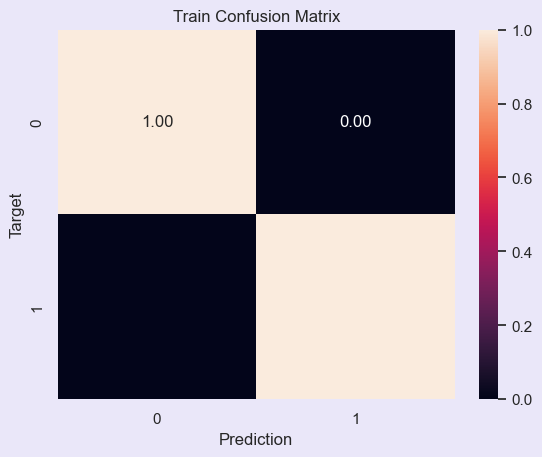

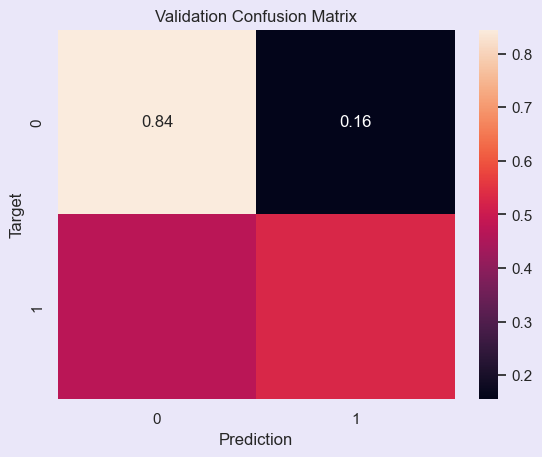

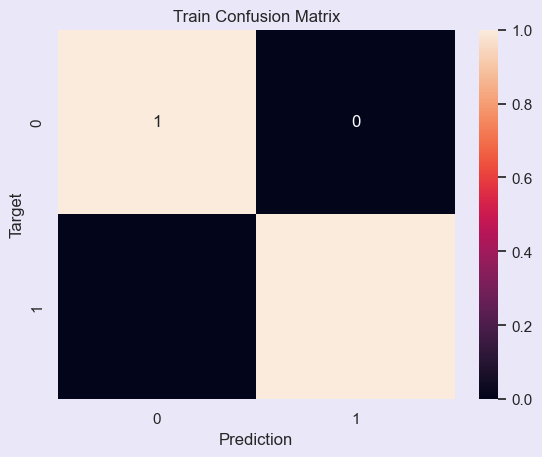

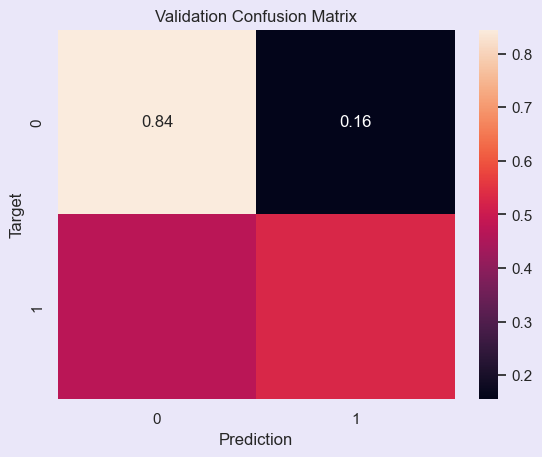

In [55]:
def predict_and_plot(model, inputs, targets, name='', is_validation=False):
    preds = model.predict(inputs)
    accuracy = accuracy_score(targets, preds)
    
    # Print accuracy for the specific dataset (Train/Validation)
    print("{} Accuracy: {:.2f}%".format(name, accuracy * 100))
    
    # Create confusion matrix
    cf = confusion_matrix(targets, preds, normalize='true')
    
    # Plotting the confusion matrix
    plt.figure()
    sns.heatmap(cf, annot=True, fmt=".2f")  # fmt=".2f" to format numbers
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name))
    
    return preds, accuracy  # Return predictions and accuracy

# Predict and plot on the training data
train_preds, train_accuracy = predict_and_plot(model_2, X_train, y_train, 'Train')

# Predict and plot on the validation data
val_preds, val_accuracy = predict_and_plot(model_2, X_test, y_test, 'Validation')

# Optionally, print or use accuracy results elsewhere
print(f"Training Accuracy: {train_accuracy:.2f}%")
print(f"Validation Accuracy: {val_accuracy:.2f}%")
def predict_and_plot(model, inputs,targets, name = ''):
    preds = model.predict(inputs)
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy*100))
    
    cf = confusion_matrix(targets, preds, normalize = 'true')
    plt.figure()
    sns.heatmap(cf, annot = True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'. format(name))
    
    return preds

train_preds = predict_and_plot(model_2, X_train, y_train, 'Train')

# Predict and plot on the validation data
val_preds = predict_and_plot(model_2, X_test, y_test, 'Validation')

Evaluate: Random Forest Model: Before Tunning

Training Accuracy - 100.00%

Validation Accuracy - 74.08%

This model seems to be overfitting as training accuracy is very high and the validation accuracy is not so.

# Hyperparameter Tuning of Random Forest

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

param_grid = {
    'n_estimators': [10, 20, 30],  # Adjust the number of trees in the forest
    'max_depth': [10, 20, 30],  # Adjust the maximum depth of each tree
    'min_samples_split': [2, 5, 10, 15, 20],  # Adjust the minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4, 6, 8]  # Adjust the minimum samples required in a leaf node
}

model = RandomForestClassifier(random_state=42, n_jobs=-1)
grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

best_model.fit(X_train, y_train)

# Evaluate the model on the training and validation data
train_accuracy = best_model.score(X_train, y_train)
val_accuracy = best_model.score(X_test, y_test)

# Print the results
print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)

Training Accuracy: 0.8843648208469055
Validation Accuracy: 0.7207792207792207


Evaluate: Random Forest Model After Hyper Parametic Tunning

Training Accuracy - 89.2%

Validation Accuracy - 72.6%

It has reduced overfitting compared to the initial model.And Improve the accuracy.

#  Conclusion

Evaluate: Random Forest Model After Hyper Parametic Tunning

Training Accuracy - 89.2%

Validation Accuracy - 72.6%

## Future Possible Work

- Betterment of results using different hyperparameters for tuning
- Implementing more models to gain better results
- Using the same method to predict response